### Advanced Regression Techniques for Auto MPG Prediction

### 📌 Introduction

In the previous notebook, we explored a baseline linear regression model to predict car fuel efficiency (measured in miles per gallon, MPG) using `LinearRegression()` model and evaluated its performance.

The results we obtained were:

- **Mean Squared Error (MSE):** 10.60  
- **Mean Absolute Error (MAE):** 2.46  
- **R² Score:** 0.79

These metrics indicate that the linear model was able to explain a significant portion of the variance in MPG values. However, linear regression assumes a strictly linear relationship between features and the target, which might not fully capture more complex patterns in the data.


### Goal of This Notebook

In this notebook, we aim to expand our analysis by applying various regression models, including:

- **Regularized linear models** (Ridge, Lasso)
- **Tree-based models** (Decision Tree, Random Forest, Gradient Boosting)
- **Distance-based models** (K-Nearest Neighbors)

We will:

1. Evaluate all models using **5-fold cross-validation** for fair comparison
2. Use **MSE**,  **MAE**, and **R²** as performance metrics
3. Visualize and interpret results to identify which models perform best
4. Prepare for model tuning in the next stage



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
           'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, sep='\s+', names=columns, na_values='?')

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [29]:
df.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
model_year,int64
origin,int64
car_name,object


### Data Preprocessing

Before applying machine learning models, we performed data preprocessing steps to ensure consistency and improve model performance. One important step was feature scaling.

Since some of the models we intend to use (e.g., Ridge, Lasso, K-Nearest Neighbors) are sensitive to the scale of the data, we standardized all numerical features using `StandardScaler`.

We also made sure to:
- Remove irrelevant columns (e.g., `car name`)
- Drop missing values in the `horsepower` column
- Split the dataset into **training** and **testing** sets (80/20 split)

In [30]:
df.drop('car_name', axis=1, inplace=True)

In [31]:
df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


In [32]:
df.dropna(inplace=True)

In [33]:
X = df.drop('mpg', axis=1)
y = df['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Evaluation: Cross-Validation

To ensure reliable model performance estimates, we used **5-fold cross-validation**. This technique splits the training data into 5 parts, trains the model on 4 parts and validates it on the 5th — repeating this process 5 times. This helps avoid biased results due to data partitioning.

For each model, we calculated:

- **Mean Absolute Error (MAE)** - average absolute difference between predicted and actual MPG
- **Mean Squared Error (MSE)** - Measures the average squared difference between predicted and actual values.
- **R² Score** - proportion of the variance in the target variable explained by the model


In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

In [35]:
import numpy as np
np.isnan(X_train).sum()

np.int64(0)

In [37]:
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

results = []

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train,
                            scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],
                            cv=5, return_train_score=False)

    results.append({
        "Model": name,
        "MAE": -np.mean(scores['test_neg_mean_absolute_error']),
        "MSE": -np.mean(scores['test_neg_mean_squared_error']),
        "R²": np.mean(scores['test_r2'])
    })

results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)

               Model       MAE        MSE        R²
5  Gradient Boosting  2.125114   8.697829  0.858928
4      Random Forest  2.119741   8.987243  0.856209
6                KNN  2.260161  10.050919  0.839324
1              Ridge  2.646452  11.891668  0.810301
0  Linear Regression  2.653971  11.907490  0.809871
2              Lasso  2.770480  13.637335  0.785426
3      Decision Tree  2.570323  13.546874  0.784083


### Model Performance Analysis

The table above summarizes the performance of various regression models.

Based on the results:

- **Gradient Boosting Regressor** achieved the best overall performance, with the lowest MSE (8.70) and highest R² score (0.859). This indicates that it captures complex relationships in the data very effectively.

- **Random Forest Regressor** closely follows, with a slightly higher MSE (8.99) but nearly identical MAE and a strong R² score (0.856). This confirms the strength of ensemble tree-based methods in modeling nonlinear patterns.

- **K-Nearest Neighbors** also performed well, with a respectable R² of 0.839, although it was slightly less accurate than the boosting and bagging models.

- Among the linear models, **Ridge Regression** outperformed both **Linear Regression** and **Lasso**, suggesting that regularization helps reduce overfitting and improves generalization.

- **Decision Tree Regressor** and **Lasso** had the weakest R² scores (~0.78), indicating poorer predictive ability compared to the more robust models.

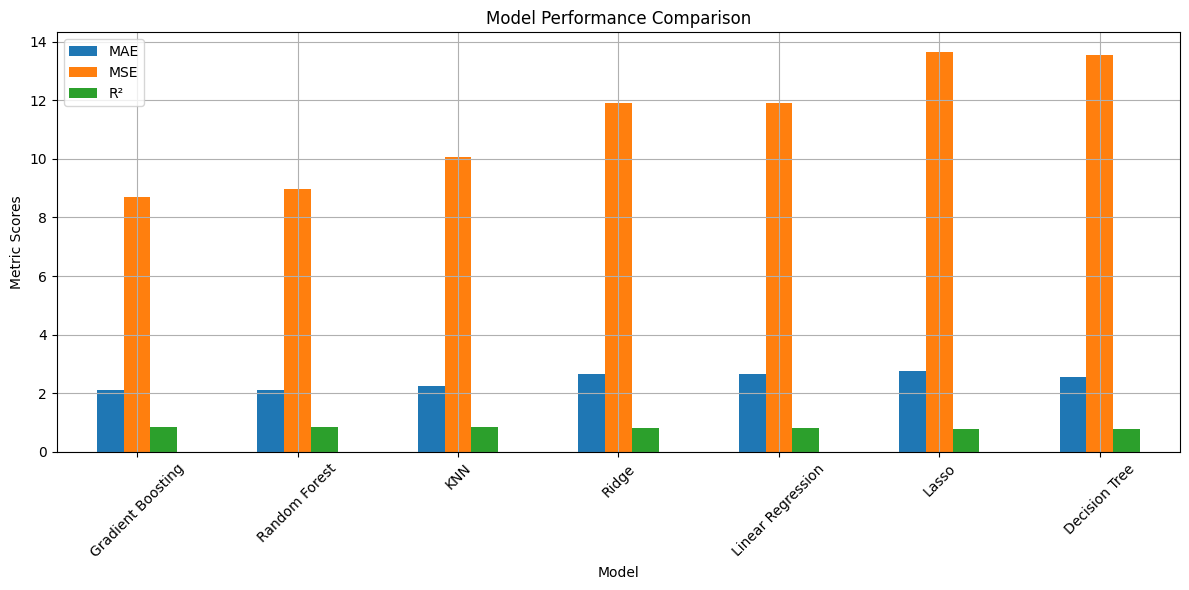

In [38]:
results_df.set_index("Model")[["MAE", "MSE", "R²"]].plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusion

These results highlight that tree-based ensemble models (Gradient Boosting and Random Forest) significantly outperform simpler linear models in this problem. They are better at capturing non-linear dependencies between features and the target variable. While linear models are easier to interpret and faster to train, they may not be sufficient when the relationships in the data are complex.

Moving forward, it makes sense to focus on tuning Gradient Boosting and Random Forest models to potentially improve performance even further.